# Plots

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Load data

In [2]:
# Original dataset
org_train_df = pd.read_csv('/Volumes/DataDrive/merged/en-train.csv')
org_test_df = pd.read_csv('/Volumes/DataDrive/merged/en-test.csv')
# Modified data (generated PerfectMatch labels)
mod_train_df = pd.read_csv('/Volumes/DataDrive/merged/en-train-extended-2.csv')
mod_test_df = pd.read_csv('/Volumes/DataDrive/merged/en-test-extended-2.csv')

# Data distribution plot

In [3]:
def distribution_plot(df, save_to=None):
    duplicate = df[df.relevance == 'PerfectMatch']
    non_duplicate = df[df.relevance != 'PerfectMatch']
    
    labels = ('Duplicate', 'Non-duplicate')
    sizes = [len(duplicate), len(non_duplicate)]

    fix, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    
    if save_to is not None:
        plt.savefig(save_to)
        
    plt.show()

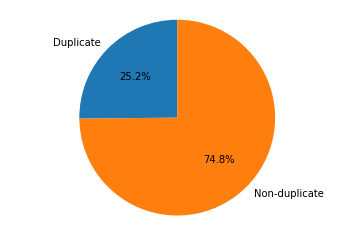

In [30]:
distribution_plot(mod_train_df, save_to='plots/train_data_distribution.png')

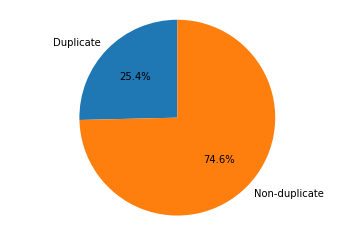

In [31]:
distribution_plot(mod_test_df, save_to='plots/test_data_distribution.png')

# Show data stats

In [17]:
org_train_stats_df = pd.read_csv('/Volumes/DataDrive/stats/en_train_stats.csv')
org_test_stats_df = pd.read_csv('/Volumes/DataDrive/stats/en_test_stats.csv')

In [32]:
org_train_stats_df.head(n=5)

,question_id,related_question_id,category,tags,score,view_count,user_id,has_accepted_answer,no_of_comments,no_of_answers,total_answer_upvotes,best_answer_upvotes,jaccard_distance,length_difference,cosine_similarity,bigram_similarity,w2v_cosine_similarity,relevance
0,447409814853,447409814853_R118191900848,english,capitalization,2,77,71802.0,True,0,2,6,4,0.882,714,0.000000e+00,0.995,0.728,Irrelevant
1,447409814853,447409814853_R949795124312,english,grammatical-number,3,146,11302.0,True,3,2,2,1,0.856,457,-3.807103e+18,0.992,0.892,Irrelevant
2,447409814853,447409814853_R335469682195,english,grammar; phrases,1,344,47872.0,True,8,3,0,1,0.882,58,-0.000000e+00,0.985,0.808,Irrelevant
3,447409814853,447409814853_R323721290682,english,irony; oxymoron,0,723,59022.0,True,4,2,3,2,0.891,627,-0.000000e+00,0.991,0.758,Irrelevant
4,447409814853,447409814853_R200600563596,english,grammar; slang; language-evolution,7,4249,8894.0,True,3,3,43,29,0.877,382,0.000000e+00,0.985,0.852,Irrelevant


In [47]:
def box_plot(df, show_plot=True, key=None, save_to=None):
    assert key is not None
    
    # Load data for different 
    irrelevant = df[df.relevance == 'Irrelevant'][key].values
    related = df[df.relevance == 'Related'][key].values
    perfect_match = df[df.relevance == 'PerfectMatch'][key].values
    
    assert(len(irrelevant) + len(related) + len(perfect_match) == len(df))

    labels = ["Irrelevant", "Related", "Perfect Match"]
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6), sharey=True)
    
    # PerfectMatch plot
    axes[0].boxplot(irrelevant, showfliers=False)
    axes[0].set_title('Relevance: Irrelevant')
    axes[0].get_xaxis().set_visible(False)
    
    axes[1].boxplot(related, showfliers=False)
    axes[1].set_title('Relevance: Related')
    axes[1].get_xaxis().set_visible(False)
    
    axes[2].boxplot(perfect_match, showfliers=False)
    axes[2].set_title('Relevance: PerfectMatch')
    axes[2].get_xaxis().set_visible(False)
    
    if save_to is not None:
        plt.savefig(save_to)
    
    plt.show()

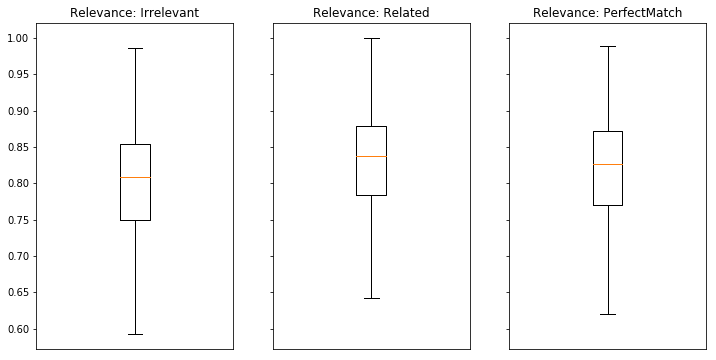

In [48]:
# Show boxplot for given key
box_plot(org_train_stats_df, key='w2v_cosine_similarity')

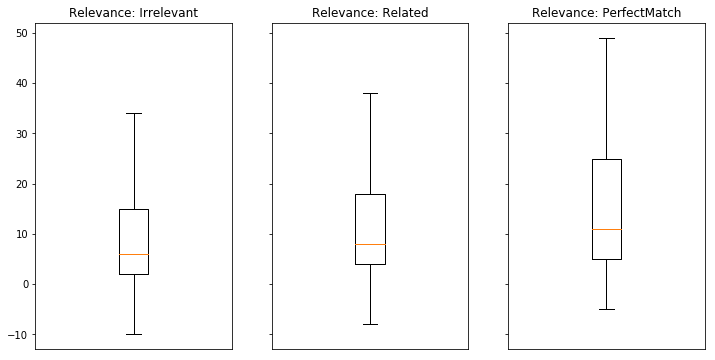

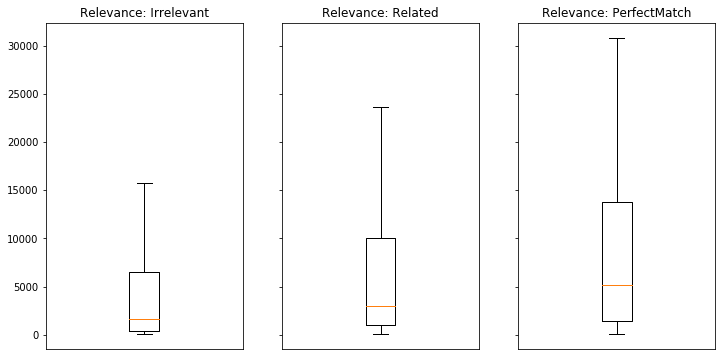

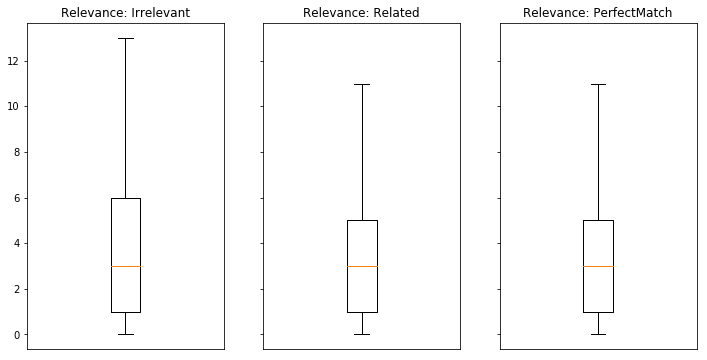

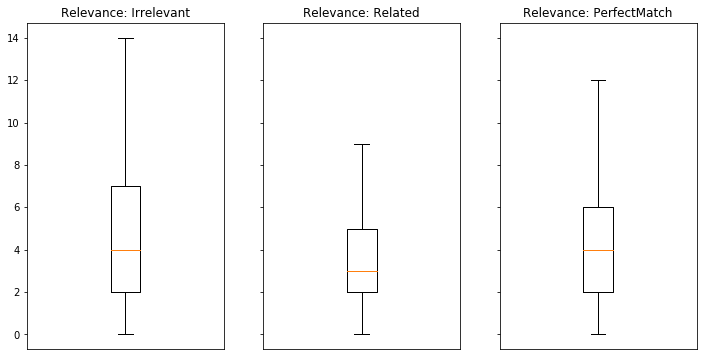

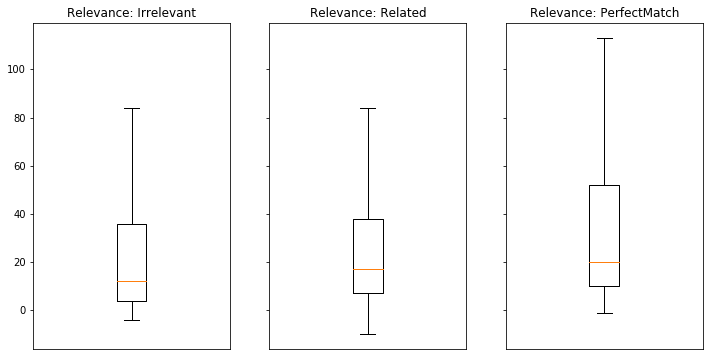

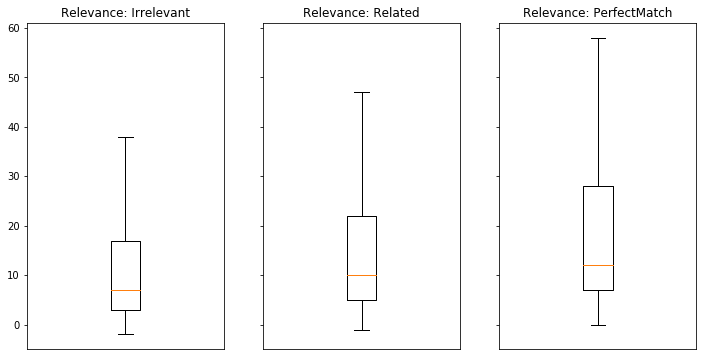

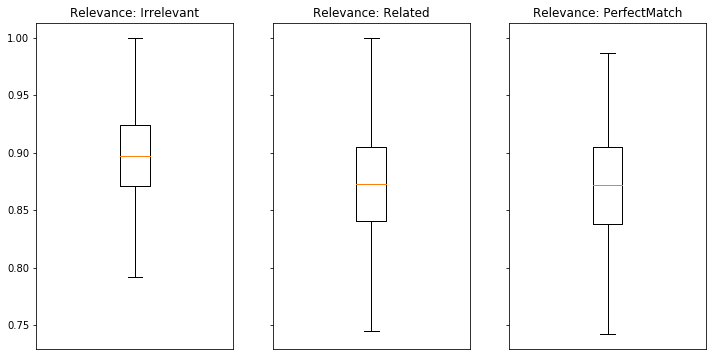

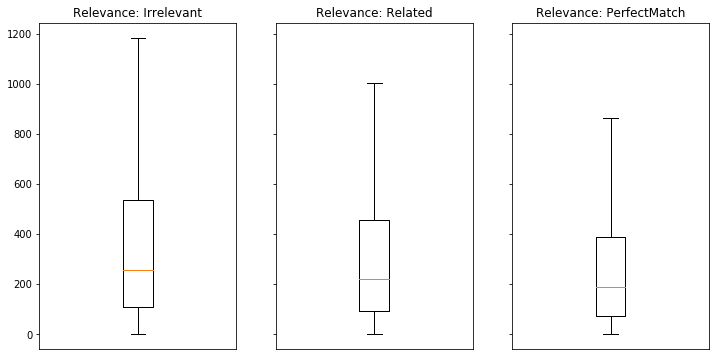

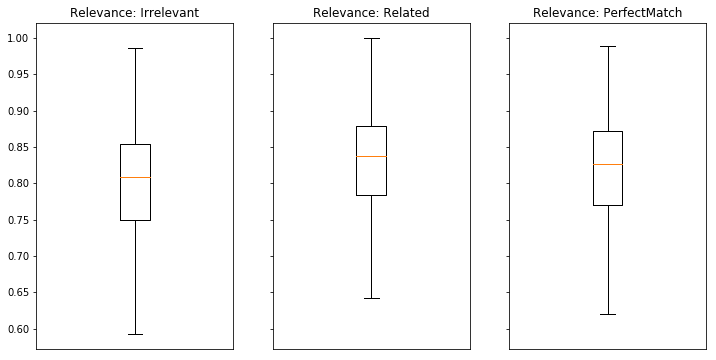

In [50]:
# Generate all plots
box_plot(org_train_stats_df, key='score', save_to='plots/en_train_score.png')
box_plot(org_train_stats_df, key='view_count', save_to='plots/en_train_view_count.png')
box_plot(org_train_stats_df, key='no_of_comments', save_to='plots/en_train_no_of_comments.png')
box_plot(org_train_stats_df, key='no_of_answers', save_to='plots/en_train_no_of_answers.png')
box_plot(org_train_stats_df, key='total_answer_upvotes', save_to='plots/en_train_total_answer_upvotes.png')
box_plot(org_train_stats_df, key='best_answer_upvotes', save_to='plots/en_train_best_answer_upvotes.png')
box_plot(org_train_stats_df, key='jaccard_distance', save_to='plots/en_train_jaccard_distance.png')
box_plot(org_train_stats_df, key='length_difference', save_to='plots/en_train_length_difference.png')
box_plot(org_train_stats_df, key='w2v_cosine_similarity', save_to='plots/en_train_cosine_similarity')